# Distribution of the main cluster's polygons' areas

In this notebook we will use the functions defined in the file "Algoritmo_Sir_Davos_Algoritmo_Areas.jl" (look the folder "Main_Cluster's_Polygons_(Brute_Force)" in the Demo Folder to learn a little more about them) to obtain a distribution of the areas of the main cluster's polygons.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Voronoi.jl")
include("Diccionario_Indices_Centroides_Voronoi.jl")
include("Algoritmo_Sir_Davos_Algoritmo_Areas.jl")

arreglo_Areas_Buenos_Poligonos (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots
gr();

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Neighborhood of the quasiperiodic lattice around an arbitrary point

First, let's get the set of points that will define the polygons in the quasiperiodic lattice around an arbitrary point

In [4]:
N = 3; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's get the X and Y coordinates of the vertices of the polygons, also get the coordinates of the point around which
#the neighborhood was generated
X, Y, APoint = region_Local_Voronoi(N, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array);

#Let's get the X and Y coordinates of the centroids of the polygons generated previously, also get the coordinates as
#tuples of the centroids and the dictionary that relates the centroid's coordinates with the polygons vertices' coordi-
#nates of the polygon that generate the centroid.
X_Centroids, Y_Centroids, Centroids, Centroids_Dictionary = centroides(X, Y);

In [5]:
#Let's get the initial Voronoi's Lattice
sites = [(Centroids[i][1], Centroids[i][2]) for i in 1:length(Centroids)]
Initial_Voronoi = getVoronoiDiagram(sites);

#Obtain the dictionary "Centroids -> Voronoi Index" in the Initial Configuration
Centroids_Voronoi_Dictionary = diccionario_Centroides_Indice_Voronoi(sites, Initial_Voronoi);

### Determine the number of layers to remove to ensure us that we get the main cluster

Now let's play with the parameter "NLayer" so we get, at each iterarion, the main cluster.

Higher value for NLayer will remove more outer layers. For a bigger margin of error (The parameter "N" in the previous cell) will be needed a higher NLayer value.

In [6]:
Copy_Centroids = copy(Centroids); #Let's work with a copy of the original Centroids array

NLayers = 20; #The number of layers to remove

#Let's remove them
algoritmo_Sir_Davos!(Copy_Centroids, NLayers);

#Redefine the set of X and Y coordinates of the vertices of the neighborhood
X, Y = centroides_A_Vertices(Copy_Centroids, Centroids_Dictionary); #Obtain the Coordinates of the polygon's vertices that give rise to a given centroid

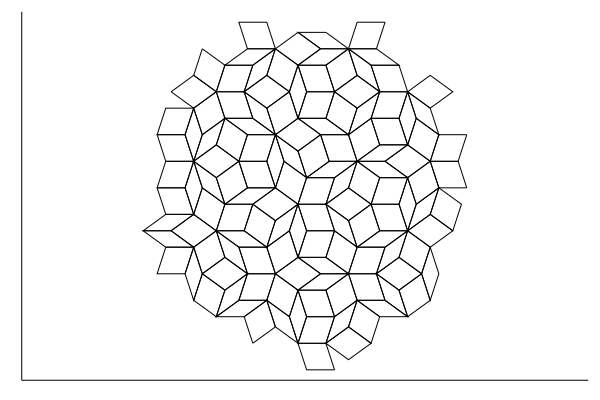

In [7]:
#Let's visualize the new neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black, xaxis = nothing, yaxis = nothing)
end
plot!()
#plot!(xlimit = [APoint[1]-13, APoint[1]+13], ylimit = [APoint[2]-13, APoint[2]+13])

### Let's get the maximum and minimum area of the polygons in the main cluster

We expect the maximum area to be near and below the value 1. That could be a good indicator for the good number of layers to remove.

In [8]:
#Let's calculate the areas of the main cluster's polygons
Main_Cluster_Areas = area_Poligonos_Voronoi_Ultima_Capa(Copy_Centroids, Centroids_Voronoi_Dictionary, Initial_Voronoi);

#Minimum and maximum area of the main cluster's polygons
println("The maximum area of the main cluster's polygons is: $(maximum(Main_Cluster_Areas))")
println("The minimum area of the main cluster's polygons is: $(minimum(Main_Cluster_Areas))")

The maximum area of the main cluster's polygons is: 0.96630859375
The minimum area of the main cluster's polygons is: 0.64453125


### Iteration of the algorithm to get a statistical distribution.

Once we get the good number of layers to remove, we can iterate the algorithm to get a statistical distribution of the areas of the main cluster's polygons

In [9]:
Iterations = 200; #The number of iterations that will be done
NLayers = 20; #The number of layers to remove in each iteration
Error_Margin = 3; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's get the array with the areas of the polygons
Main_Clusters_Areas = arreglo_Areas_Buenos_Poligonos(Iterations, NLayers, Error_Margin, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array);

Se han realizado 1 iteraciones.
Se han realizado 2 iteraciones.
Se han realizado 3 iteraciones.
Se han realizado 4 iteraciones.
Se han realizado 5 iteraciones.
Se han realizado 6 iteraciones.
Se han realizado 7 iteraciones.
Se han realizado 8 iteraciones.
Se han realizado 9 iteraciones.
Se han realizado 10 iteraciones.
Se han realizado 11 iteraciones.
Se han realizado 12 iteraciones.
Se han realizado 13 iteraciones.
Se han realizado 14 iteraciones.
Se han realizado 15 iteraciones.
Se han realizado 16 iteraciones.
Se han realizado 17 iteraciones.
Se han realizado 18 iteraciones.
Se han realizado 19 iteraciones.
Se han realizado 20 iteraciones.
Se han realizado 21 iteraciones.
Se han realizado 22 iteraciones.
Se han realizado 23 iteraciones.
Se han realizado 24 iteraciones.
Se han realizado 25 iteraciones.
Se han realizado 26 iteraciones.
Se han realizado 27 iteraciones.
Se han realizado 28 iteraciones.
Se han realizado 29 iteraciones.
Se han realizado 30 iteraciones.
Se han realizado 31

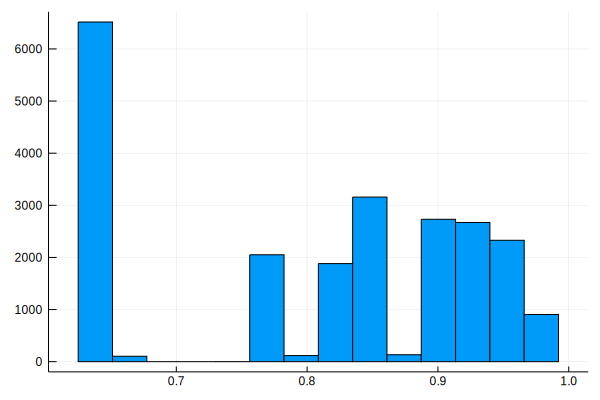

In [10]:
#Let's visualize the histogram of the areas obtained in the previous cell
histogram(Main_Clusters_Areas,bins=range(minimum(Main_Clusters_Areas),stop = maximum(Main_Clusters_Areas), length = 15), key = false)

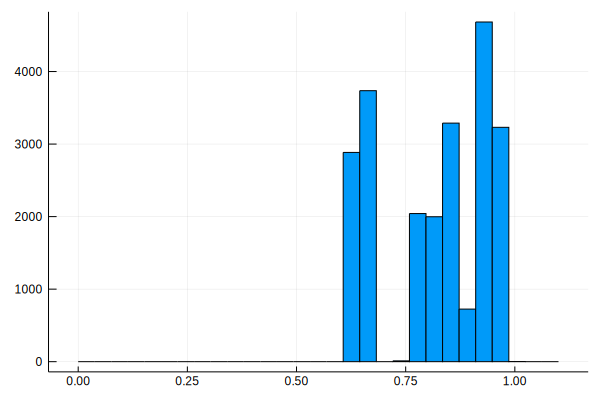

In [11]:
histogram(Main_Clusters_Areas,bins=range(0, 1.1, length = 30), key = false)

In [12]:
#Let's see the maximum area obtained in all the iterations
println("The maximum area obtained was: $(maximum(Main_Clusters_Areas))")

The maximum area obtained was: 0.9921875
